# Capstone project - severity of car accidents in Catalonia between 2010 and 2020

## Contents
* [1. Introduction](#introduction)
* [2. Data](#data)
  * [2.1. Data Importing](#di)
  * [2.2. Data Cleaning](#dc)
* [3. Analysis](#an)
  * [3.1. Weather conditions](#wea)
  * [3.2. Units](#unit)
  * [3.3. Road](#status)
  * [3.4. Time](#time)
* [4. Modelling](#model)
* [5. Evaluation](#evalu)
* [6. Conclusions](#conc)

## 1. Introduction <a name='introduction'></a>

Traffic accidents, little instants in which the life can change, and in some occasions, end; year by year thousands of lives are lost due this terrible incidents which can be caused for the most insignificant reasons, as animals on the way or a distraction while driving.
There is not a unique reason for the traffic accidents, the causes are too diverse and there are so many factors intervening at the same time that every case needs to be evaluated in detail in order to find all the hidden answers, answers which can be founded on the driver, the speed, the weather, etc.
On this project we’ll find the correlation between the specific factors and the severity of the accidents, understanding severity as the amount of human lives affected on the incident, for this we’ll need a dataset in which all the different conditions present on the moment of the incident are signed.

## 2. Data <a name='data'></a>

For this project we will use the dataset "Accidents de trànsit amb morts o ferits greus a Catalunya" wich reports all the traffic incidets reported on Catalonya on the period 2010-2020 with the details about weather conditions, road conditions and number of casualties, the data set can be found on the web page of Catalonia government open data “https://analisi.transparenciacatalunya.cat/Transport/Accidents-de-tr-nsit-amb-morts-o-ferits-greus-a-Ca/rmgc-ncpb”. On this open source dataset we'll find all the information related to the accidents and the different condtions that affected it.

###  2.1. Data Importing <a name='di'></a>

In [1]:
%%capture
! pip install seaborn

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# get the data
!wget -O traffic_accidents.csv https://analisi.transparenciacatalunya.cat/resource/rmgc-ncpb.csv

--2020-09-23 14:54:16--  https://analisi.transparenciacatalunya.cat/resource/rmgc-ncpb.csv
Resolving analisi.transparenciacatalunya.cat (analisi.transparenciacatalunya.cat)... 52.51.221.164, 52.16.222.96, 52.16.175.47
Connecting to analisi.transparenciacatalunya.cat (analisi.transparenciacatalunya.cat)|52.51.221.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘traffic_accidents.csv’

    [   <=>                                 ] 614,365     1.17MB/s   in 0.5s   

2020-09-23 14:54:17 (1.17 MB/s) - ‘traffic_accidents.csv’ saved [614365]



In [4]:
# Define the dataframe
df = pd.read_csv('traffic_accidents.csv')
df.head()

,any,zona,dat,via,pk,nommun,nomcom,nomdem,f_morts,f_ferits_greus,...,d_superficie,d_tipus_via,d_titularitat_via,d_tracat_altimetric,d_vent,grupdialab,hor,gruphor,tipacc,tipdia
0,2010,Zona urbana,2010-01-25T23:33:00.000,SE,999999,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",Feiners,2333,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,2010-10-31T01:00:00.000,N-240,999,LLEIDA,Segria,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,2010-05-17T15:27:00.000,N-II,7087,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,1527,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,2010-08-21T22:30:00.000,SE,999999,BARCELONA,Barcelones,Barcelona,0,2,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,223,Nit,Col.lisió de vehicles en marxa,dis
4,2010,Zona urbana,2010-05-07T17:45:00.000,SE,999999,BADALONA,Barcelones,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,1745,Tarda,Bolcada a la calcada,div


In [5]:
# Display the type of data in the columns
df.dtypes

any                            int64
zona                          object
dat                           object
via                           object
pk                             int64
nommun                        object
nomcom                        object
nomdem                        object
f_morts                        int64
f_ferits_greus                 int64
f_ferits_lleus                 int64
f_victimes                     int64
f_unitats_implicades           int64
f_vianants_implicades          int64
f_bicicletes_implicades        int64
f_ciclomotors_implicades       int64
f_motocicletes_implicades      int64
f_veh_lleugers_implicades      int64
f_veh_pesants_implicades       int64
f_altres_unit_implicades       int64
f_unit_desc_implicades         int64
c_velocitat_via              float64
d_acc_amb_fuga                object
d_boira                       object
d_caract_entorn               object
d_carril_especial             object
d_circulacio_mesures_esp      object
d

In [6]:
# Description of the dataframe
df.describe()

,any,pk,f_morts,f_ferits_greus,f_ferits_lleus,f_victimes,f_unitats_implicades,f_vianants_implicades,f_bicicletes_implicades,f_ciclomotors_implicades,f_motocicletes_implicades,f_veh_lleugers_implicades,f_veh_pesants_implicades,f_altres_unit_implicades,f_unit_desc_implicades,c_velocitat_via,hor
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,879.000000,1000.000000
mean,2010.0,572623.259000,0.183000,1.024000,0.515000,1.722000,2.037000,0.270000,0.064000,0.130000,0.331000,1.060000,0.163000,0.019000,0.0,87.042093,840.776000
std,0.0,494317.964487,0.440119,0.575982,1.073745,1.328337,0.752461,0.505327,0.264526,0.348168,0.558346,0.816742,0.465454,0.143735,0.0,22.981359,760.323907
min,2010.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.000000,0.000000
25%,2010.0,318.750000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,80.000000,125.000000
50%,2010.0,999999.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,749.000000
75%,2010.0,999999.000000,0.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,100.000000,1538.250000
max,2010.0,999999.000000,4.000000,5.000000,13.000000,14.000000,8.000000,4.000000,2.000000,2.000000,6.000000,5.000000,6.000000,2.000000,0.0,120.000000,2359.000000


Size and shape of the dataframe

In [7]:
# Data size
print('Dataset size is', df.size)


# Data shape
print('Dataset shape is', df.shape)

Dataset size is 58000
Dataset shape is (1000, 58)


### 2.2. Data Cleaning <a name='dc'></a>

First we'll remove all the unnecessary columns

In [8]:
# Drop unnecesary columns
df.drop(columns = ['any', 'pk', 'nomdem', 'nomcom', 'dat', 'd_gravetat', 'hor', 'f_unit_desc_implicades', 'nommun', 'd_subtipus_tram', 'd_subtipus_accident',
                   'zona', 'd_titularitat_via', 'via', 'd_acc_amb_fuga', 'd_influit_boira', 'd_influit_caract_entorn', 'd_influit_circulacio',
                   'd_influit_estat_clima', 'd_influit_inten_vent', 'd_influit_lluminositat', 'd_influit_mesu_esp', 'd_influit_visibilitat', 'tipdia',
                   'f_unitats_implicades', 'f_ferits_greus', 'f_ferits_lleus', 'f_morts'], inplace = True)
df.head()

,f_victimes,f_vianants_implicades,f_bicicletes_implicades,f_ciclomotors_implicades,f_motocicletes_implicades,f_veh_lleugers_implicades,f_veh_pesants_implicades,f_altres_unit_implicades,c_velocitat_via,d_boira,...,d_regulacio_prioritat,d_sentits_via,d_subzona,d_superficie,d_tipus_via,d_tracat_altimetric,d_vent,grupdialab,gruphor,tipacc
0,1,0,0,0,0,1,0,1,100.0,No n'hi ha,...,Sols norma prioritat de pas,Un sol sentit,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,"Calma, vent molt suau",Feiners,Nit,Col.lisió de vehicles en marxa
1,4,0,0,0,0,1,0,0,40.0,No n'hi ha,...,Senyal Stop o cedeix pas,Doble sentit,Carretera,Sec i net,Carretera convencional,Pla,"Calma, vent molt suau",CapDeSetmana,Nit,Sortida de la calcada sense especificar
2,3,0,0,0,0,2,2,0,80.0,No n'hi ha,...,NaN,Doble sentit,Carretera,Sec i net,Carretera convencional,Rampa o pendent,"Calma, vent molt suau",Feiners,Tarda,Col.lisió de vehicles en marxa
3,9,0,0,0,0,2,0,0,100.0,No n'hi ha,...,Semàfor,Un sol sentit,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,"Calma, vent molt suau",CapDeSetmana,Nit,Col.lisió de vehicles en marxa
4,1,0,0,0,1,0,0,0,100.0,No n'hi ha,...,Sols norma prioritat de pas,Un sol sentit,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,"Calma, vent molt suau",CapDeSetmana,Tarda,Bolcada a la calcada


Now we'll see the size and shape of the new dataframe

In [9]:
# New data size
print('New dataset size is', df.size)


# New data shape
print('New dataset shape is', df.shape)

New dataset size is 30000
New dataset shape is (1000, 30)


Now we'll translate the name of the columns to english for a better understanding

In [10]:
df.rename(columns = {'f_victimes':'total_victims', 'f_vianants_implicades':'involved_pedestrian(s)', 'f_bicicletes_implicades':'involved_bycicle(s)',
                     'f_ciclomotors_implicades':'involved_moped(s)', 'f_motocicletes_implicades':'involved_motorcycle(s)',
                     'f_veh_lleugers_implicades':'light_vehicle(s)_involved', 'f_veh_pesants_implicades':'heavy_vehicle(s)_involved',
                     'f_altres_unit_implicades':'other_type_unit_involved', 'c_velocitat_via':'maximun_allowed_speed', 'd_boira':'haze',
                     'd_caract_entorn':'terrain_characteristics', 'd_carril_especial':'special_lane', 'd_circulacio_mesures_esp':'special_traffic_measures',
                     'd_climatologia':'climatology', 'd_func_esp_via':'special_function_track', 'd_influit_obj_calcada':'object_on_way',
                     'd_influit_solcs_rases':'f/d_in_road', 'd_inter_seccio':'intersection', 'd_limit_velocitat':'speed_limit_visualization',
                     'd_lluminositat':'illumination', 'd_regulacio_prioritat':'priority_regulation', 'd_sentits_via':'directions', 'tipacc':'type_of_accident',
                     'd_subzona':'zone', 'd_superficie':'road_condition', 'd_tipus_via':'road_type', 'd_tracat_altimetric':'altimeter_layout',
                     'd_vent':'wind', 'grupdialab':'day_type', 'gruphor':'moment'}, inplace = True)
# f/d = furrows and ditches



# Display the first rows on with the new column names
df.head()

,total_victims,involved_pedestrian(s),involved_bycicle(s),involved_moped(s),involved_motorcycle(s),light_vehicle(s)_involved,heavy_vehicle(s)_involved,other_type_unit_involved,maximun_allowed_speed,haze,...,priority_regulation,directions,zone,road_condition,road_type,altimeter_layout,wind,day_type,moment,type_of_accident
0,1,0,0,0,0,1,0,1,100.0,No n'hi ha,...,Sols norma prioritat de pas,Un sol sentit,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,"Calma, vent molt suau",Feiners,Nit,Col.lisió de vehicles en marxa
1,4,0,0,0,0,1,0,0,40.0,No n'hi ha,...,Senyal Stop o cedeix pas,Doble sentit,Carretera,Sec i net,Carretera convencional,Pla,"Calma, vent molt suau",CapDeSetmana,Nit,Sortida de la calcada sense especificar
2,3,0,0,0,0,2,2,0,80.0,No n'hi ha,...,NaN,Doble sentit,Carretera,Sec i net,Carretera convencional,Rampa o pendent,"Calma, vent molt suau",Feiners,Tarda,Col.lisió de vehicles en marxa
3,9,0,0,0,0,2,0,0,100.0,No n'hi ha,...,Semàfor,Un sol sentit,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,"Calma, vent molt suau",CapDeSetmana,Nit,Col.lisió de vehicles en marxa
4,1,0,0,0,1,0,0,0,100.0,No n'hi ha,...,Sols norma prioritat de pas,Un sol sentit,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,"Calma, vent molt suau",CapDeSetmana,Tarda,Bolcada a la calcada


In [11]:
# Type of objects on each column
df.dtypes

total_victims                  int64
involved_pedestrian(s)         int64
involved_bycicle(s)            int64
involved_moped(s)              int64
involved_motorcycle(s)         int64
light_vehicle(s)_involved      int64
heavy_vehicle(s)_involved      int64
other_type_unit_involved       int64
maximun_allowed_speed        float64
haze                          object
terrain_characteristics       object
special_lane                  object
special_traffic_measures      object
climatology                   object
special_function_track        object
object_on_way                 object
f/d_in_road                   object
intersection                  object
speed_limit_visualization     object
illumination                  object
priority_regulation           object
directions                    object
zone                          object
road_condition                object
road_type                     object
altimeter_layout              object
wind                          object
d

We'll convert all the object type elements into numericall type, the value 'Sense especificar' that means 'Unknown' will be considered as missing data and will have the value of 'NaN'. The values that indicate the absence of special characteristics as 'No n'hi ha' or 'Bon Temps' will have the value of 0

In [12]:
# Replace missing data with NaN value
df.replace('Sense especificar', np.nan, inplace = True)
df.replace('Sense Especificar', np.nan, inplace = True)
df.replace('NaN', np.nan, inplace = True)

In [13]:
# Replace values by their translation into english
# Binary values will be transformed into boolean [0, 1]

df['haze'].replace(["No n'hi ha", "Si"], [0, 1], inplace = True)
df['terrain_characteristics'].replace(["A nivell", "Desmunt", "Mixt", "Terraplé"], ['at the level', 'disassemble', 'mixed', 'embankment'], inplace = True)
df['special_lane'].replace(["No n'hi ha", "Altres", "Carril acceleració", "Carril avançament", "Carril bici", "Carril bus", "Carril central", "Carril d'alentiment",
                            "Carril habilitat en sentit contrari habitual", "Carril lent", "Carril reversible", "Habilitació voral/carril addicional"],
                           ['no', 'others', 'fast lane', 'overtaking lane', 'bicycle lane', 'bus lane', 'central lane', 'slowing lane', 'opposite direction lane',
                            'slow lane', 'reversible lane', 'additional lane'], inplace = True)
df['special_traffic_measures'].replace(["No n'hi ha", 'Accident trànsit anterior', 'Cons', 'Esdeveniment extraordinari', 'Obres', 'Serveis de neteja o manteniment'],
                                       ['no', 'prev traffic accident', 'cons', 'extraordinary event', 'works', 'cleaning/manitenance'], inplace = True)
df['climatology'].replace(['Bon temps', 'Nevant', 'Pluja dèbil', 'Pluja forta'], ['good weather', 'snow', 'soft rain', 'hard rain'], inplace = True)
df['special_function_track'].replace(['Sense funció especial', 'Ronda, cinturo o circumval.lacio', 'Travessera', 'Variant'], ['no', 'round point', 'traverse',
                                     'variant'], inplace = True)
df['object_on_way'].replace(['No', 'Si'], [0, 1], inplace = True)
df['f/d_in_road'].replace(['No', 'Si'], [0, 1], inplace = True)
df['intersection'].replace(['En secció', 'Arribant o eixint intersecció fins 50m', 'Dintre intersecció'], ['no', 'more than 50m', 'inside intersection'],
                           inplace = True)
df['speed_limit_visualization'].replace(['Genérica via', 'Senyal velocitat'], [0, 1], inplace = True)
df['illumination'].replace(['Alba o capvespre', 'De dia, dia clar', 'De dia, dia fosc', 'De nit, il·luminació artificial insuficient',
                            'De nit, il·luminació artificial suficient', 'De nit, sense llum artificial'], ['down/dusk', 'clear day', 'dark day',
                            'night/insufficient artificial lightning', 'night/sufficient artificial lightning', 'night/no artificial lightning'], inplace = True)
df['priority_regulation'].replace(['Persona autoritzada', 'Semàfor', 'Senyal Stop o cedeix pas', 'Sols marques viàries (inclou pas vianants)',
                                   'Sols norma prioritat de pas'], ['authorized person', 'traffic light', 'stop signal', 'road markings', 'step priority'],
                                  inplace = True)
df['directions'].replace(['Un sol sentit', 'Doble sentit'], ['one way lane', 'double way lane'], inplace = True)
df['type_of_accident'].replace(['Altres', 'Atropellament', 'Bolcada a la calcada', "Col.lisió d'un vehicle contra un obstacle de la calcada",
                                'Col.lisió de vehicles en marxa', 'Sortida de la calcada sense especificar'], ['other', 'run over', 'over turned',
                                'vehicle against obstacle', 'moving vehicles', 'track exit'], inplace = True)
df['zone'].replace(['Carretera', 'Travessera', 'Zona urbana'], ['road', 'travers', 'city'], inplace = True)
df['road_condition'].replace(['Sec i net', 'Inundat', 'Mullat', 'Nevat', 'Relliscós'], ['dry', 'flooded', 'wet', 'snowed', 'slippery'], inplace = True)
df['road_type'].replace(['Via urbana( inclou carrer i carrer residencial)', 'Carretera convencional', 'Autovia', 'Autopista', 'Altres'], ['urban way',
                        'conventional road', 'autovia', 'highway', 'other'], inplace = True)
df['altimeter_layout'].replace(['Pla', 'Rampa o pendent', 'Gual', 'Canvi rasant'], ['plan', 'ramp/slope', 'gual', 'slow change'], inplace = True)
df['wind'].replace(['Calma, vent molt suau', 'Vent moderat', 'Vent fort'], ['no/soft wind', 'medium wind', 'hard wind'], inplace = True)
df['day_type'].replace(['CapDeSetmana', 'Feiners'], ['weekend', 'work day'], inplace = True)
df['moment'].replace(['Matí', 'Tarda', 'Nit'], ['morning', 'afternoon', 'night'], inplace = True)

In [14]:
df.head()

,total_victims,involved_pedestrian(s),involved_bycicle(s),involved_moped(s),involved_motorcycle(s),light_vehicle(s)_involved,heavy_vehicle(s)_involved,other_type_unit_involved,maximun_allowed_speed,haze,...,priority_regulation,directions,zone,road_condition,road_type,altimeter_layout,wind,day_type,moment,type_of_accident
0,1,0,0,0,0,1,0,1,100.0,0,...,step priority,one way lane,city,dry,urban way,NaN,no/soft wind,work day,night,moving vehicles
1,4,0,0,0,0,1,0,0,40.0,0,...,stop signal,double way lane,road,dry,conventional road,plan,no/soft wind,weekend,night,track exit
2,3,0,0,0,0,2,2,0,80.0,0,...,NaN,double way lane,road,dry,conventional road,ramp/slope,no/soft wind,work day,afternoon,moving vehicles
3,9,0,0,0,0,2,0,0,100.0,0,...,traffic light,one way lane,city,dry,urban way,NaN,no/soft wind,weekend,night,moving vehicles
4,1,0,0,0,1,0,0,0,100.0,0,...,step priority,one way lane,city,dry,urban way,NaN,no/soft wind,weekend,afternoon,over turned


In [15]:
print(df.shape)
print(df.size)

(1000, 30)
30000


The missing values will be left missing in order not to modify the correlation calculations that each variable may have with respect to the target

In [16]:
# Amount of missing values per column being false the missing values
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

total_victims
False    1000
Name: total_victims, dtype: int64

involved_pedestrian(s)
False    1000
Name: involved_pedestrian(s), dtype: int64

involved_bycicle(s)
False    1000
Name: involved_bycicle(s), dtype: int64

involved_moped(s)
False    1000
Name: involved_moped(s), dtype: int64

involved_motorcycle(s)
False    1000
Name: involved_motorcycle(s), dtype: int64

light_vehicle(s)_involved
False    1000
Name: light_vehicle(s)_involved, dtype: int64

heavy_vehicle(s)_involved
False    1000
Name: heavy_vehicle(s)_involved, dtype: int64

other_type_unit_involved
False    1000
Name: other_type_unit_involved, dtype: int64

maximun_allowed_speed
False    879
True     121
Name: maximun_allowed_speed, dtype: int64

haze
False    1000
Name: haze, dtype: int64

terrain_characteristics
False    667
True     333
Name: terrain_characteristics, dtype: int64

special_lane
False    997
True       3
Name: special_lane, dtype: int64

special_traffic_measures
False    997
True       3
Name: special_t

**With this relults is determined to drop the 'altimeter_layout' column, the reason for this is the total amount of missing values which is almost the 50% of the total amount of samples.**

In [17]:
df.drop(columns = ['altimeter_layout'], inplace = True)

Now we proceed to normalyze the data on the numeric columns.

In [18]:
# Normalize data
df['total_victims'] = df['total_victims']/df['total_victims'].max()
df['involved_pedestrian(s)'] = df['involved_pedestrian(s)']/df['involved_pedestrian(s)'].max()
df['involved_bycicle(s)'] = df['involved_bycicle(s)']/df['involved_bycicle(s)'].max()
df['involved_moped(s)'] = df['involved_moped(s)']/df['involved_moped(s)'].max()
df['involved_motorcycle(s)'] = df['involved_motorcycle(s)']/df['involved_motorcycle(s)'].max()
df['light_vehicle(s)_involved'] = df['light_vehicle(s)_involved']/df['light_vehicle(s)_involved'].max()
df['heavy_vehicle(s)_involved'] = df['heavy_vehicle(s)_involved']/df['heavy_vehicle(s)_involved'].max()
df['other_type_unit_involved'] = df['other_type_unit_involved']/df['other_type_unit_involved'].max()
df['maximun_allowed_speed'] = df['maximun_allowed_speed']/df['maximun_allowed_speed'].max()
df['haze'] = df['haze']/df['haze'].max()
df['object_on_way'] = df['object_on_way']/df['object_on_way'].max()
df['f/d_in_road'] = df['f/d_in_road']/df['f/d_in_road'].max()
df['speed_limit_visualization'] = df['speed_limit_visualization']/df['speed_limit_visualization'].max()


df.head()

,total_victims,involved_pedestrian(s),involved_bycicle(s),involved_moped(s),involved_motorcycle(s),light_vehicle(s)_involved,heavy_vehicle(s)_involved,other_type_unit_involved,maximun_allowed_speed,haze,...,illumination,priority_regulation,directions,zone,road_condition,road_type,wind,day_type,moment,type_of_accident
0,0.071429,0.0,0.0,0.0,0.000000,0.2,0.000000,0.5,0.833333,0.0,...,night/sufficient artificial lightning,step priority,one way lane,city,dry,urban way,no/soft wind,work day,night,moving vehicles
1,0.285714,0.0,0.0,0.0,0.000000,0.2,0.000000,0.0,0.333333,0.0,...,night/sufficient artificial lightning,stop signal,double way lane,road,dry,conventional road,no/soft wind,weekend,night,track exit
2,0.214286,0.0,0.0,0.0,0.000000,0.4,0.333333,0.0,0.666667,0.0,...,clear day,NaN,double way lane,road,dry,conventional road,no/soft wind,work day,afternoon,moving vehicles
3,0.642857,0.0,0.0,0.0,0.000000,0.4,0.000000,0.0,0.833333,0.0,...,night/sufficient artificial lightning,traffic light,one way lane,city,dry,urban way,no/soft wind,weekend,night,moving vehicles
4,0.071429,0.0,0.0,0.0,0.166667,0.0,0.000000,0.0,0.833333,0.0,...,clear day,step priority,one way lane,city,dry,urban way,no/soft wind,weekend,afternoon,over turned


## 3. Analysis <a name='an'></a>

For this analysis we'll split the data between the type of variables we have on the dataset and we'll discover the really important variables that influence in the severity of the accident.

### 3.1. Weather conditions <a name='wea'> </a>

First we'll analyze the target 'total_victims' with the weather conditions, we'll perform an ANOVA analysis and a visual display to determine the influence of weather conditions on traffic accidents.

In [19]:
# ANOVA test for variable 'haze' and the total amount of victims
df_haze = df[['total_victims', 'haze']].groupby(['haze'])
f_val_haze, p_val_haze = stats.f_oneway(df_haze.get_group(0)['total_victims'], df_haze.get_group(1)['total_victims'])
print( "ANOVA 'haze' results: F =", f_val_haze, ", P =", p_val_haze)

ANOVA 'haze' results: F = 0.0017826483685356306 , P = 0.9663306317943027


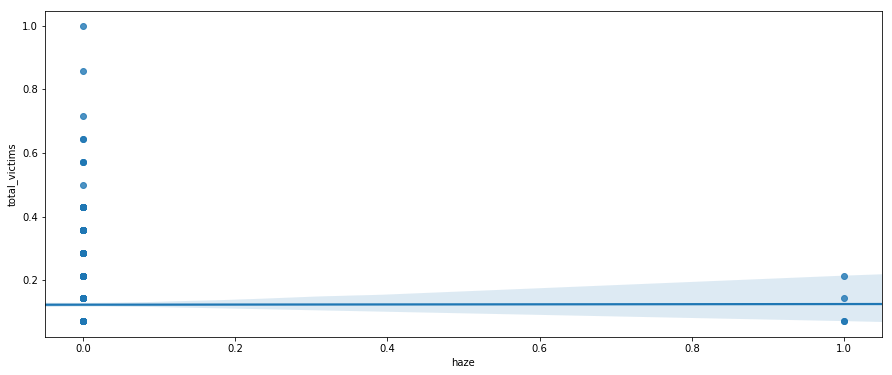

In [20]:
# Counting the amount of accidents with and without haze
plt.figure(figsize = (15,  6))
ax1 = sns.regplot(x='haze', y='total_victims', data=df)

In [21]:
# ANOVA test for variable 'climatology' and the total amount of victims
df_clim = df[['total_victims', 'climatology']].groupby(['climatology'])
f_val_clim, p_val_clim = stats.f_oneway(df_clim.get_group('good weather')['total_victims'], df_clim.get_group('hard rain')['total_victims'],
                                        df_clim.get_group('snow')['total_victims'], df_clim.get_group('soft rain')['total_victims'])
print( "ANOVA 'climatology' results: F =", f_val_clim, ", P =", p_val_clim)

ANOVA 'climatology' results: F = 0.4213725948384978 , P = 0.7377107488358381


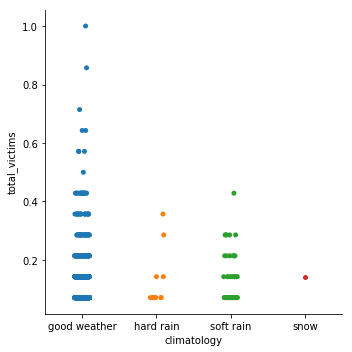

In [22]:
# plot of victims with the variables of climatology
ax2 = sns.catplot(x='climatology', y='total_victims', data=df)

In [23]:
# ANOVA test for variable 'wind' and the total amount of victims
df_wind = df[['total_victims', 'wind']].groupby(['wind'])
f_val_wind, p_val_wind = stats.f_oneway(df_wind.get_group('hard wind')['total_victims'], df_wind.get_group('medium wind')['total_victims'],
                                        df_wind.get_group('no/soft wind')['total_victims'])
print( "ANOVA 'wind' results: F =", f_val_wind, ", P =", p_val_wind)

ANOVA 'wind' results: F = 0.4697729109392311 , P = 0.6252826588611887


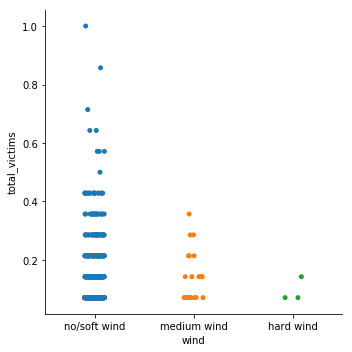

In [24]:
# plot of victims with the variables of wind
ax3 = sns.catplot(x='wind', y='total_victims', data=df)

In [25]:
# ANOVA test for the variables 'haze', 'climatology' and 'wind', and the total amount of victims
f_val_weather, p_val_weather = stats.f_oneway(df_wind.get_group('hard wind')['total_victims'], df_wind.get_group('medium wind')['total_victims'],
                              df_wind.get_group('no/soft wind')['total_victims'], df_clim.get_group('good weather')['total_victims'],
                              df_clim.get_group('hard rain')['total_victims'], df_clim.get_group('snow')['total_victims'],
                              df_clim.get_group('soft rain')['total_victims'], df_haze.get_group(0)['total_victims'], df_haze.get_group(1)['total_victims'])
print( "ANOVA weather results: F =", f_val_weather, ", P =", p_val_weather)

ANOVA weather results: F = 0.27575950474032196 , P = 0.973981327431665


The visual analysis allows to deduct that the weather conditions display an important relevance on the occurance of a traffic accident

### 3.2. Units <a name='unit'></a>

In this case we have the numerical variables wich declare the number and type of the units involved on the accident, for the analysis we'll use a multiple linear regression model, the reason for that is that we have 7 independent variables wich are all numerical, however, first, we'll make first a scatterplot for each variable, and we'll see if htere is some linearity on the amount of victims.

In [26]:
#correlation between numeric variables in df
df.corr()

,total_victims,involved_pedestrian(s),involved_bycicle(s),involved_moped(s),involved_motorcycle(s),light_vehicle(s)_involved,heavy_vehicle(s)_involved,other_type_unit_involved,maximun_allowed_speed,haze,object_on_way,f/d_in_road,speed_limit_visualization
total_victims,1.000000,-0.159475,-0.088905,-0.079780,-0.045864,0.467493,0.078221,-0.024736,0.050036,0.001336,0.027278,-0.031908,0.050953
involved_pedestrian(s),-0.159475,1.000000,-0.106936,-0.137117,-0.221276,-0.167835,-0.085159,0.011990,0.047065,-0.033877,-0.025833,-0.025833,-0.137525
involved_bycicle(s),-0.088905,-0.106936,1.000000,-0.068690,-0.116463,-0.119722,-0.052292,-0.032014,-0.127612,-0.015340,0.063156,0.020698,0.071776
involved_moped(s),-0.079780,-0.137117,-0.068690,1.000000,-0.164930,-0.133061,-0.069119,-0.049406,-0.096752,-0.023674,-0.001069,0.031290,0.034663
involved_motorcycle(s),-0.045864,-0.221276,-0.116463,-0.164930,1.000000,-0.269685,-0.119222,-0.078442,0.064483,-0.037587,0.047265,0.007028,-0.051000
light_vehicle(s)_involved,0.467493,-0.167835,-0.119722,-0.133061,-0.269685,1.000000,-0.128444,-0.086462,0.061107,0.072973,-0.006607,-0.061611,0.050976
heavy_vehicle(s)_involved,0.078221,-0.085159,-0.052292,-0.069119,-0.119222,-0.128444,1.000000,0.013511,-0.001586,-0.022204,-0.007367,-0.031498,0.083559
other_type_unit_involved,-0.024736,0.011990,-0.032014,-0.049406,-0.078442,-0.086462,0.013511,1.000000,0.062577,-0.008381,-0.011889,-0.011889,-0.065642
maximun_allowed_speed,0.050036,0.047065,-0.127612,-0.096752,0.064483,0.061107,-0.001586,0.062577,1.000000,-0.028089,0.039402,-0.042949,-0.840457
haze,0.001336,-0.033877,-0.015340,-0.023674,-0.037587,0.072973,-0.022204,-0.008381,-0.028089,1.000000,-0.005697,-0.005697,0.032112


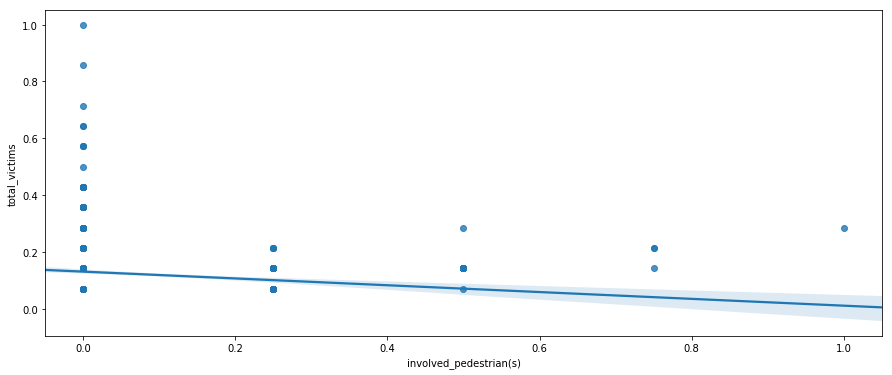

In [27]:
#Regression plot ot the predictor 'involved_pedestrian(s)' and the target
plt.figure(figsize = (15,  6))
ax4 = sns.regplot(x='involved_pedestrian(s)', y='total_victims', data=df)

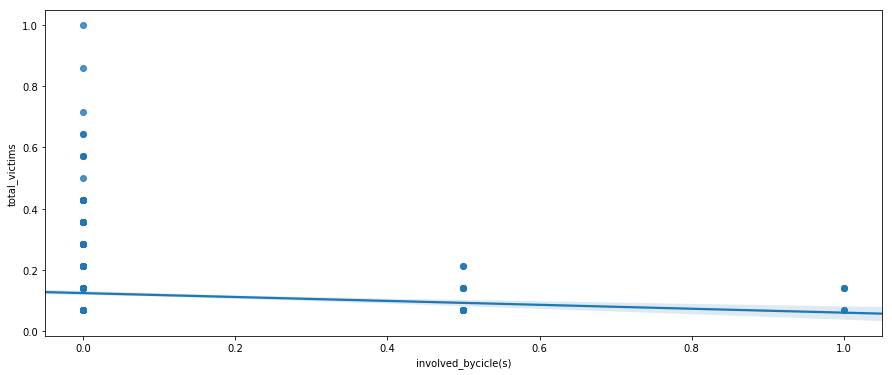

In [28]:
#Regression plot ot the predictor 'involved_bycicle(s)' and the target
plt.figure(figsize = (15,  6))
ax5 = sns.regplot(x='involved_bycicle(s)', y='total_victims', data=df)

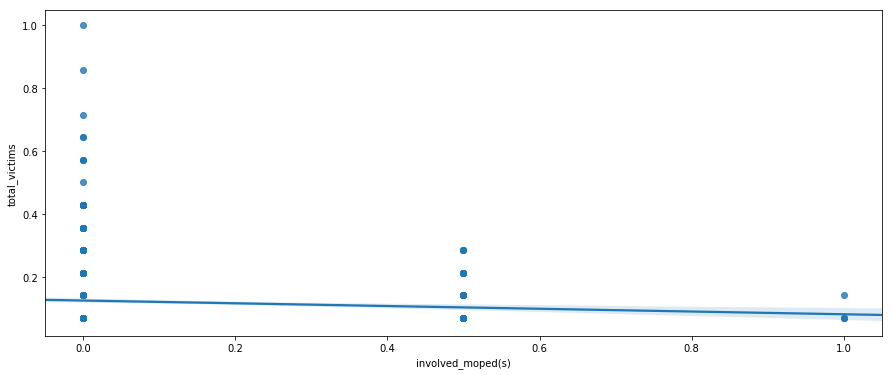

In [29]:
#Regression plot ot the predictor 'involved_moped(s)' and the target
plt.figure(figsize = (15,  6))
ax6 = sns.regplot(x='involved_moped(s)', y='total_victims', data=df)

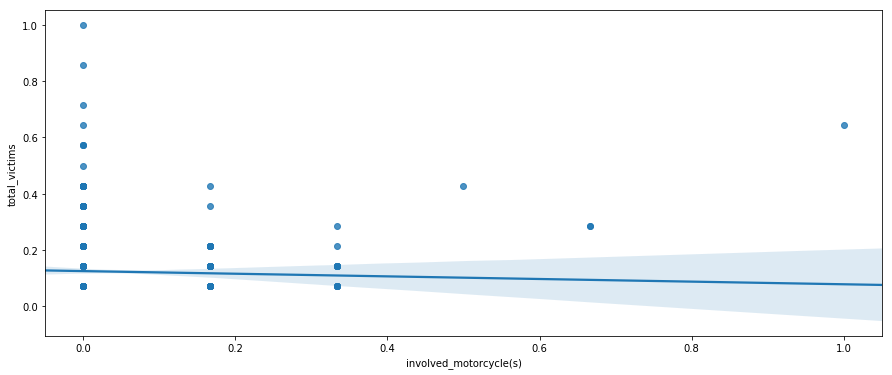

In [30]:
#Regression plot ot the predictor 'involved_motorcycle(s)' and the target
plt.figure(figsize = (15,  6))
ax7 = sns.regplot(x='involved_motorcycle(s)', y='total_victims', data=df)

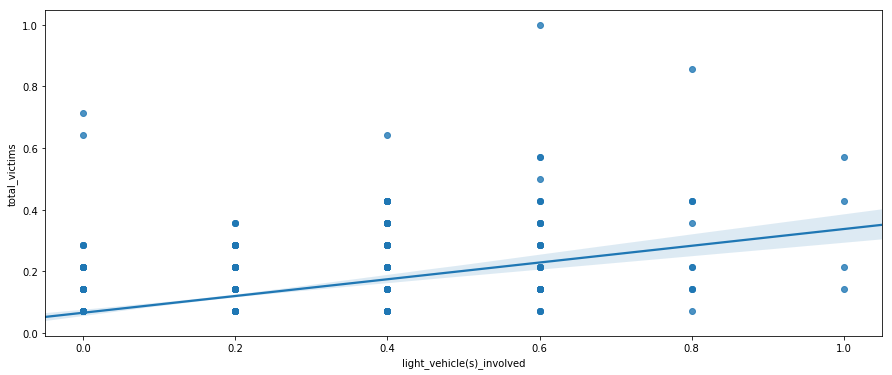

In [31]:
#Regression plot ot the predictor 'light_vehicle(s)_involved' and the target
plt.figure(figsize = (15,  6))
ax8 = sns.regplot(x='light_vehicle(s)_involved', y='total_victims', data=df)

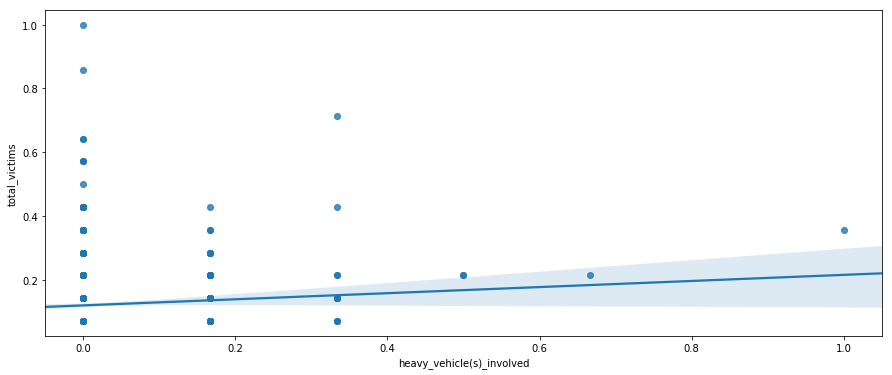

In [32]:
#Regression plot ot the predictor 'heavy_vehicle(s)_involved' and the target
plt.figure(figsize = (15,  6))
ax9 = sns.regplot(x='heavy_vehicle(s)_involved', y='total_victims', data=df)

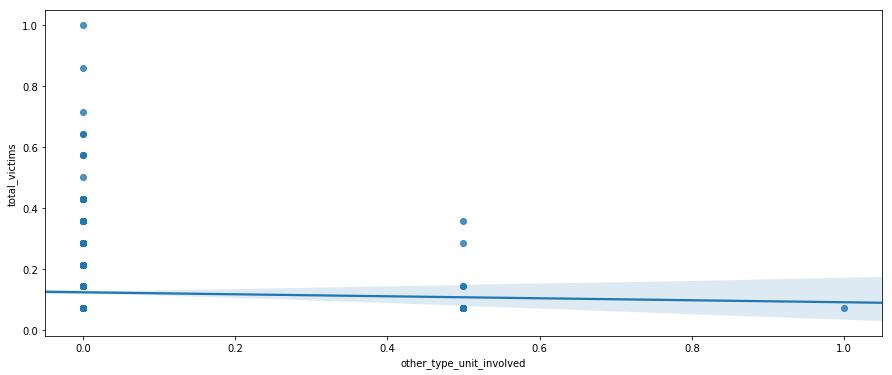

In [33]:
#Regression plot ot the predictor 'other_type_unit_involved' and the target
plt.figure(figsize = (15,  6))
ax10 = sns.regplot(x='other_type_unit_involved', y='total_victims', data=df)

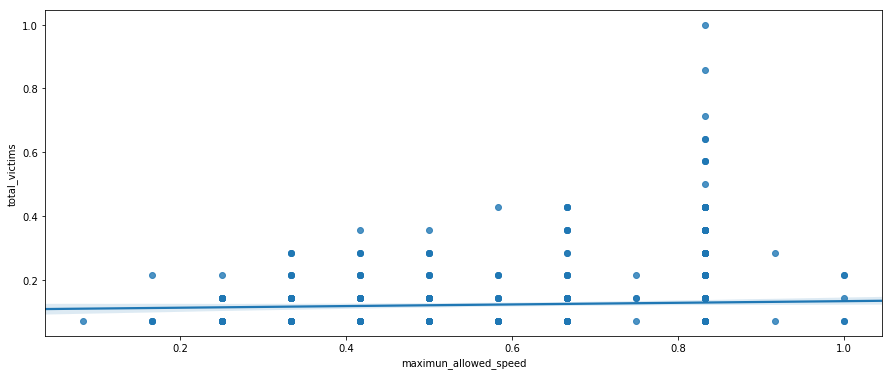

In [34]:
#Regression plot ot the predictor 'maximun_allowed_speed' and the target
plt.figure(figsize = (15,  6))
ax11 = sns.regplot(x='maximun_allowed_speed', y='total_victims', data=df)

With this analysis we can determine that the column with a greater correlation with the targets is 'light_vehicle(s)_involved' wich has the bigger correlation with each one of the four targets, with this we notice that regular cars tend to be more present in traffic accidents and also have more fatal incidents than other unit types.

In [35]:
# slice the dataframe in order to only have the columns we'll use
df_unit = df[['involved_pedestrian(s)', 'involved_bycicle(s)', 'involved_moped(s)', 'involved_motorcycle(s)', 'light_vehicle(s)_involved', 'heavy_vehicle(s)_involved', 'other_type_unit_involved',
              'maximun_allowed_speed']]
df_unit.replace(np.nan, 0, inplace = True)
df_unit.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,involved_pedestrian(s),involved_bycicle(s),involved_moped(s),involved_motorcycle(s),light_vehicle(s)_involved,heavy_vehicle(s)_involved,other_type_unit_involved,maximun_allowed_speed
0,0.0,0.0,0.0,0.000000,0.2,0.000000,0.5,0.833333
1,0.0,0.0,0.0,0.000000,0.2,0.000000,0.0,0.333333
2,0.0,0.0,0.0,0.000000,0.4,0.333333,0.0,0.666667
3,0.0,0.0,0.0,0.000000,0.4,0.000000,0.0,0.833333
4,0.0,0.0,0.0,0.166667,0.0,0.000000,0.0,0.833333


In [36]:
# New dataframe data type
df_unit.dtypes

involved_pedestrian(s)       float64
involved_bycicle(s)          float64
involved_moped(s)            float64
involved_motorcycle(s)       float64
light_vehicle(s)_involved    float64
heavy_vehicle(s)_involved    float64
other_type_unit_involved     float64
maximun_allowed_speed        float64
dtype: object

In [37]:
# define the function to use
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
# Train the model
lm1.fit(df_unit, df['total_victims'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
# find the intercept and the slope
print('the intercept of the model is:', lm1.intercept_, 'and the slopes are:', lm1.coef_)

the intercept of the model is: 0.041143146125977664 and the slopes are: [-0.02870925 -0.00577348  0.00647435  0.10182278  0.29364037  0.18127746
  0.03344008  0.01638575]


In [40]:
Y_hat_1 = lm1.predict(df_unit)

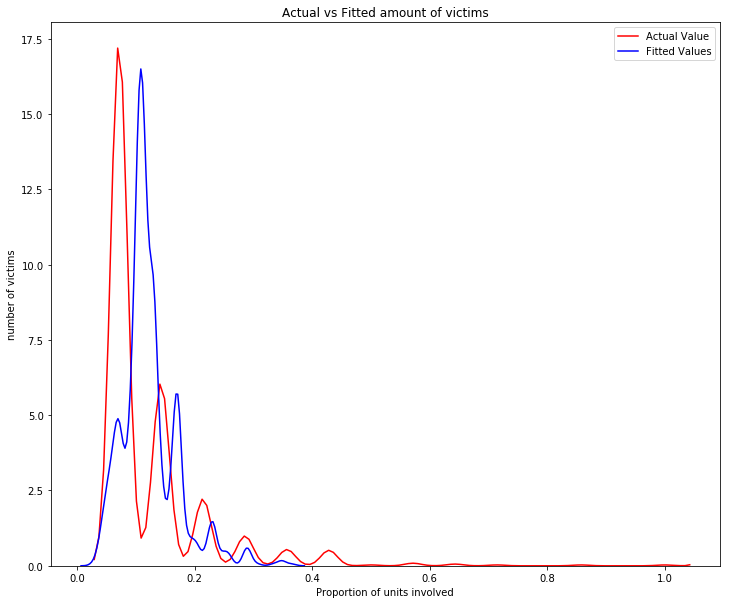

In [41]:
# Graphic of the multiple linear regression model to compare fitted and actual values on the model
width = 12
height = 10

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['total_victims'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted amount of victims')
plt.xlabel('Proportion of units involved')
plt.ylabel('number of victims')

plt.show()
plt.close()

We can notice that there is a correlation on the multiple linear model, but individually theres not too linear relationship between the variables.

### 3.3. Road <a name='status'></a>

For this analysis we'll also use the ANOVA test to identifie wich one of the road conditions is the most relevant in the moment of a traffic accident, just as the weather conditions, this group includes values of the type object and the type boolean.

*First we go with the boolean values*

In [42]:
# ANOVA test for variable 'object_on_way' and the total amount of victims
df_object = df[['total_victims', 'object_on_way']].groupby(['object_on_way'])
f_val_object, p_val_object = stats.f_oneway(df_object.get_group(0)['total_victims'], df_object.get_group(1)['total_victims'])
print( "ANOVA 'object_on_way' results: F =", f_val_object, ", P =", p_val_object)

ANOVA 'object_on_way' results: F = 0.7424148156899221 , P = 0.3890956035602747


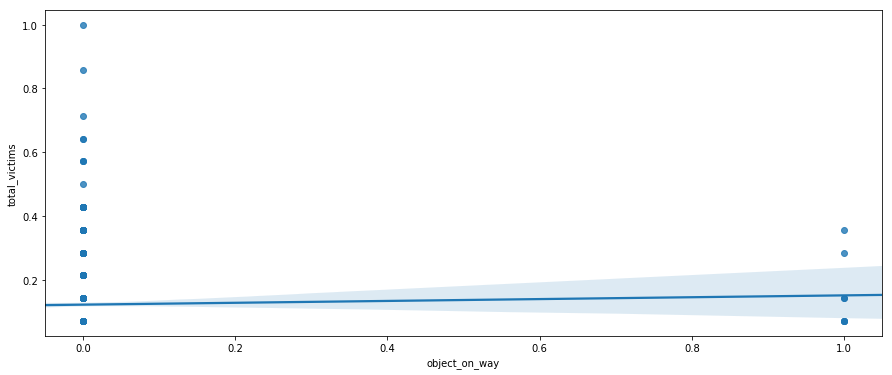

In [43]:
# Counting the amount of accidents with and without haze
plt.figure(figsize = (15,  6))
ax1 = sns.regplot(x= 'object_on_way', y='total_victims', data=df)

In [44]:
# ANOVA test for variable 'f/d_in_road' and the total amount of victims
df_fd = df[['total_victims', 'f/d_in_road']].groupby(['f/d_in_road'])
f_val_fd, p_val_fd = stats.f_oneway(df_fd.get_group(0)['total_victims'], df_fd.get_group(1)['total_victims'])
print( "ANOVA 'f/d_in_road' results: F =", f_val_fd, ", P =", p_val_fd)

ANOVA 'f/d_in_road' results: F = 1.0160798134656535 , P = 0.31369526937627945


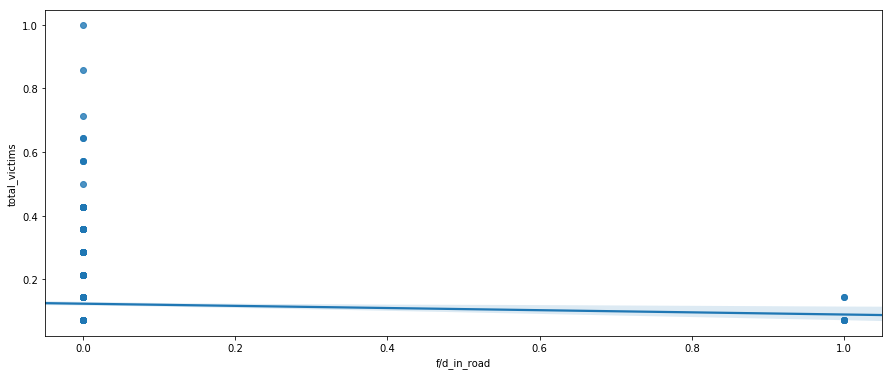

In [45]:
# Counting the amount of accidents with and without haze
plt.figure(figsize = (15,  6))
ax1 = sns.regplot(x='f/d_in_road', y='total_victims', data=df)

In [46]:
# ANOVA test for variable 'speed_limit_visualization' and the total amount of victims
df_slv = df[['total_victims', 'speed_limit_visualization']].groupby(['speed_limit_visualization'])
f_val_slv, p_val_slv = stats.f_oneway(df_slv.get_group(0)['total_victims'], df_slv.get_group(1)['total_victims'])
print( "ANOVA 'speed_limit_visualization' results: F =", f_val_slv, ", P =", p_val_slv)

ANOVA 'speed_limit_visualization' results: F = 2.5977550163813765 , P = 0.10733138517210848


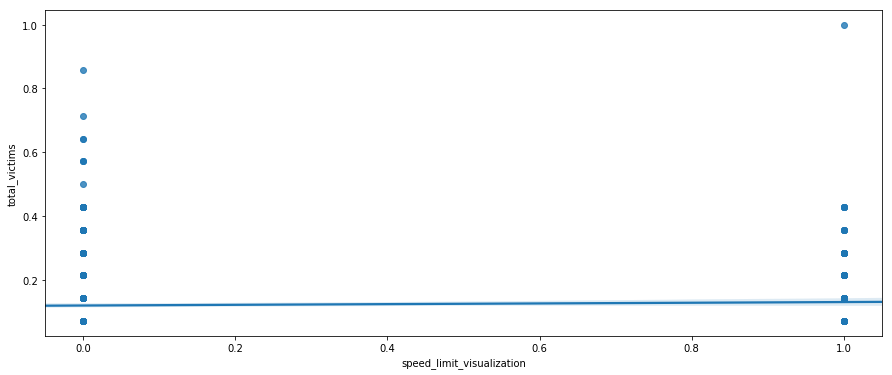

In [47]:
# Counting the amount of accidents with and without haze
plt.figure(figsize = (15,  6))
ax1 = sns.regplot(x='speed_limit_visualization', y='total_victims', data=df)

*Now we go with the categorical values*

In [48]:
# ANOVA test for variable 'intersection' and the total amount of victims
df_inter = df[['total_victims', 'intersection']].groupby(['intersection'])
f_val_inter, p_val_inter = stats.f_oneway(df_inter.get_group('inside intersection')['total_victims'], df_inter.get_group('more than 50m')['total_victims'],
                                          df_inter.get_group('no')['total_victims'])
print( "ANOVA 'intersection' results: F =", f_val_inter, ", P =", p_val_inter)

ANOVA 'intersection' results: F = 6.05631033469909 , P = 0.002430115836837187


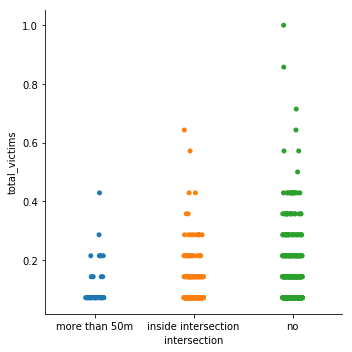

In [49]:
# plot of victims with the variables of intersection
ax12 = sns.catplot(x='intersection', y='total_victims', data=df)

In [50]:
# ANOVA test for variable 'illumination' and the total amount of victims
df_illum = df[['total_victims', 'illumination']].groupby(['illumination'])
f_val_illum, p_val_illum = stats.f_oneway(df_illum.get_group('clear day')['total_victims'],
                                          df_illum.get_group('dark day')['total_victims'],
                                          df_illum.get_group('down/dusk')['total_victims'],
                                          df_illum.get_group('night/insufficient artificial lightning')['total_victims'],
                                          df_illum.get_group('night/no artificial lightning')['total_victims'],
                                          df_illum.get_group('night/sufficient artificial lightning')['total_victims'])
print( "ANOVA 'illumination' results: F =", f_val_illum, ", P =", p_val_illum)

ANOVA 'illumination' results: F = 3.397608635219638 , P = 0.004753541498259431


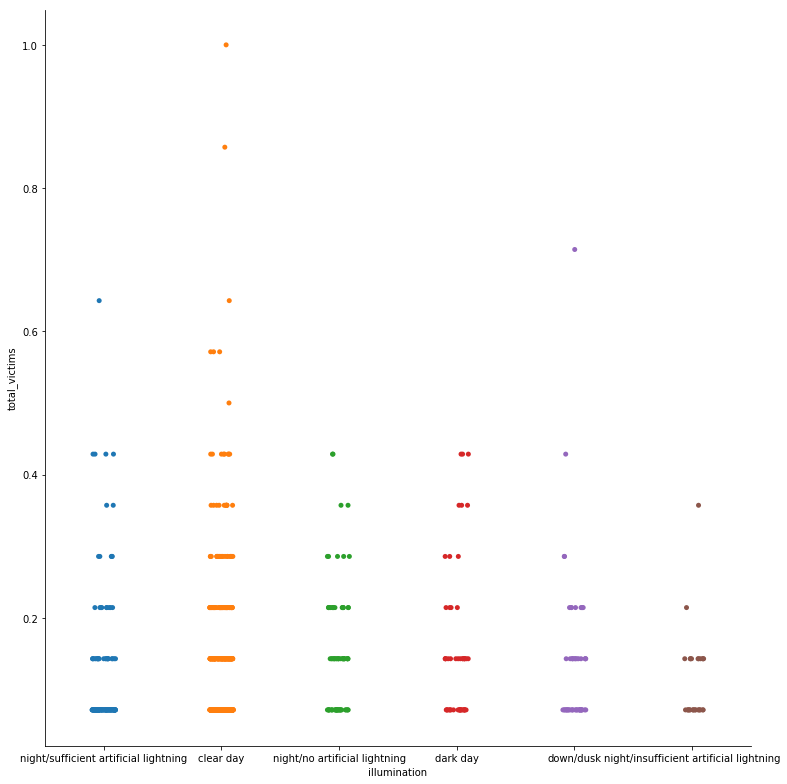

In [51]:
# plot of victims with the variables of illumination
ax13 = sns.catplot(x='illumination', y='total_victims', data=df, height = 11, aspect = 1)

In [52]:
# ANOVA test for variable 'priority_regulation' and the total amount of victims
df_prior = df[['total_victims', 'priority_regulation']].groupby(['priority_regulation'])
f_val_prior, p_val_prior = stats.f_oneway(df_prior.get_group('authorized person')['total_victims'], df_prior.get_group('road markings')['total_victims'],
                                          df_prior.get_group('step priority')['total_victims'], df_prior.get_group('stop signal')['total_victims'],
                                          df_prior.get_group('traffic light')['total_victims'])
print( "ANOVA 'priority_regulation' results: F =", f_val_prior, ", P =", p_val_prior)

ANOVA 'priority_regulation' results: F = 1.8143109838400624 , P = 0.1257887239185214


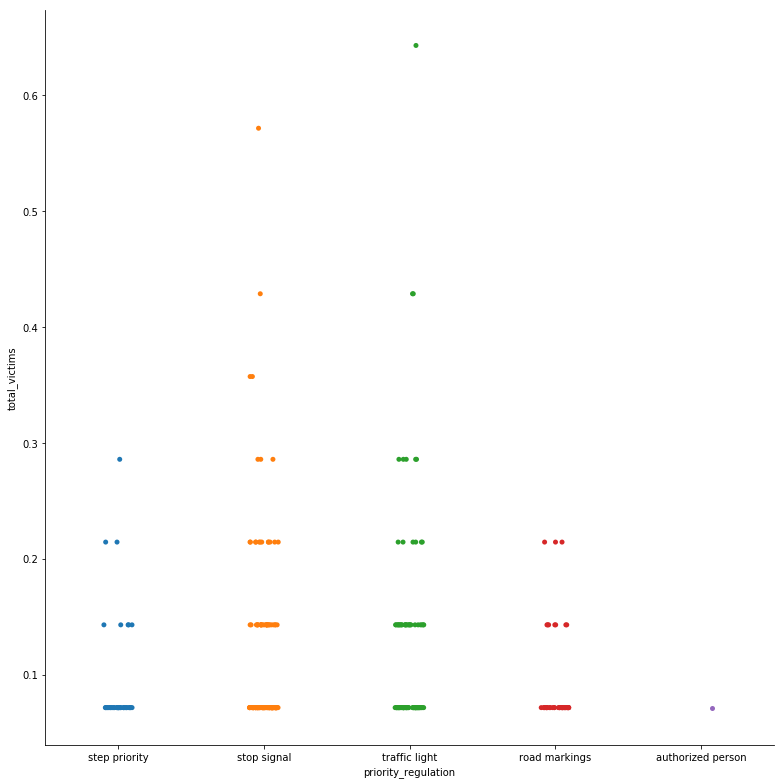

In [53]:
# plot of victims with the variables of priority_regulation
ax14= sns.catplot(x='priority_regulation', y='total_victims', data=df, height = 11, aspect = 1)

In [54]:
# ANOVA test for variable 'directions' and the total amount of victims
df_dir = df[['total_victims', 'directions']].groupby(['directions'])
f_val_dir, p_val_dir = stats.f_oneway(df_dir.get_group('double way lane')['total_victims'], df_dir.get_group('one way lane')['total_victims'])
print( "ANOVA 'directions' results: F =", f_val_dir, ", P =", p_val_dir)

ANOVA 'directions' results: F = 11.052351805953512 , P = 0.0009226068738546857


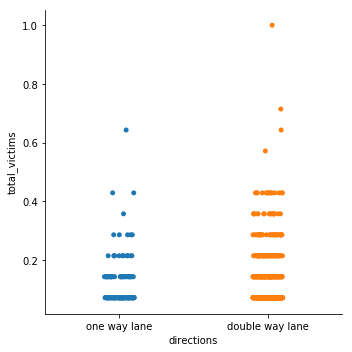

In [55]:
# plot of victims with the variables of directions
ax15 = sns.catplot(x='directions', y='total_victims', data=df)

In [56]:
# ANOVA test for variable 'type_of_accident' and the total amount of victims
df_toa = df[['total_victims', 'type_of_accident']].groupby(['type_of_accident'])
f_val_toa, p_val_toa = stats.f_oneway(df_toa.get_group('moving vehicles')['total_victims'], df_toa.get_group('other')['total_victims'],
                                      df_toa.get_group('over turned')['total_victims'], df_toa.get_group('run over')['total_victims'],
                                      df_toa.get_group('track exit')['total_victims'], df_toa.get_group('vehicle against obstacle')['total_victims'])
print( "ANOVA 'type_of_accident' results: F =", f_val_toa, ", P =", p_val_toa)

ANOVA 'type_of_accident' results: F = 15.275249004947161 , P = 1.7417624203085918e-14


<Figure size 3240x1296 with 0 Axes>

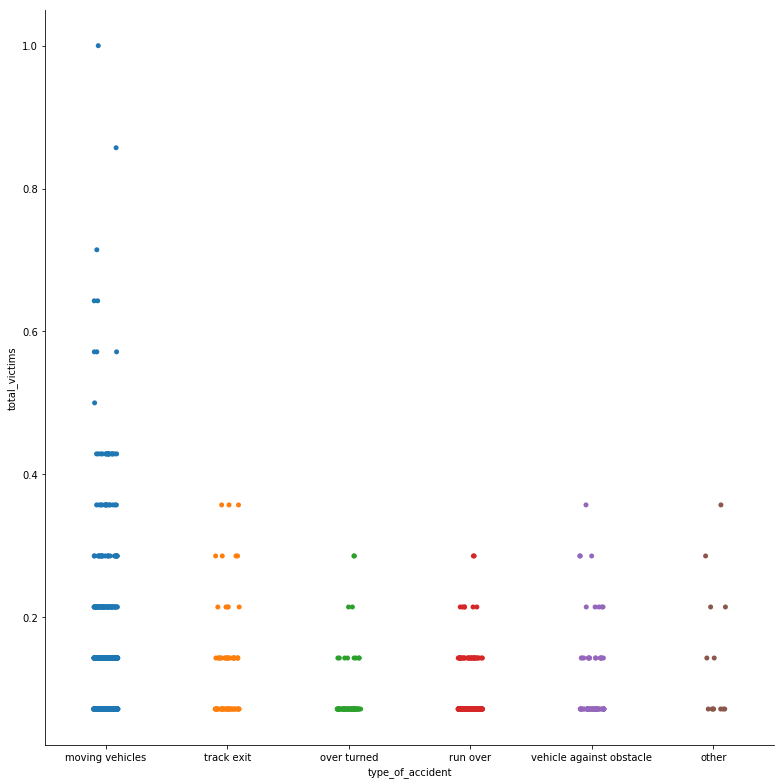

In [57]:
# plot of victims with the variables of type_of_accident
plt.figure(figsize=(45,18))
sns.catplot(x='type_of_accident', y='total_victims', data=df, height = 11, aspect = 1)

In [58]:
# ANOVA test for variable 'zone' and the total amount of victims
df_zone = df[['total_victims', 'zone']].groupby(['zone'])
f_val_zone, p_val_zone = stats.f_oneway(df_zone.get_group('city')['total_victims'], df_zone.get_group('road')['total_victims'],
                                        df_zone.get_group('travers')['total_victims'])
print( "ANOVA 'zone' results: F =", f_val_zone, ", P =", p_val_zone)

ANOVA 'zone' results: F = 34.682299595053934 , P = 2.7449564262843147e-15


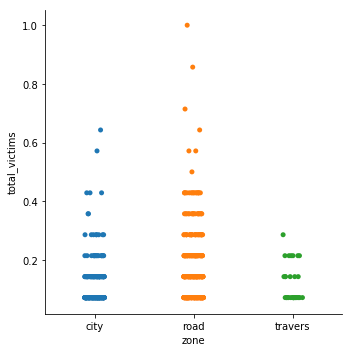

In [59]:
# plot of victims with the variables of zone
ax17 = sns.catplot(x='zone', y='total_victims', data=df)

In [60]:
# ANOVA test for variable 'road_condition' and the total amount of victims
df_rc = df[['total_victims', 'road_condition']].groupby(['road_condition'])
f_val_rc, p_val_rc = stats.f_oneway(df_rc.get_group('dry')['total_victims'], df_rc.get_group('flooded')['total_victims'],
                                    df_rc.get_group('slippery')['total_victims'], df_rc.get_group('snowed')['total_victims'],
                                    df_rc.get_group('wet')['total_victims'])
print( "ANOVA 'road_condition' results: F =", f_val_rc, ", P =", p_val_rc)

ANOVA 'road_condition' results: F = 0.02159783036731838 , P = 0.999091784804667


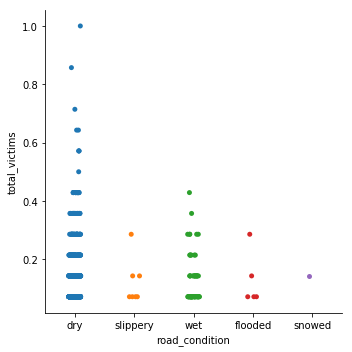

In [61]:
# plot of victims with the variables of road_condition
ax18 = sns.catplot(x='road_condition', y='total_victims', data=df)

In [62]:
# ANOVA test for variable 'road_type' and the total amount of victims
df_rt = df[['total_victims', 'road_type']].groupby(['road_type'])
f_val_rt, p_val_rt = stats.f_oneway(df_rt.get_group('autovia')['total_victims'], df_rt.get_group('conventional road')['total_victims'],
                                    df_rt.get_group('highway')['total_victims'], df_rt.get_group('other')['total_victims'],
                                    df_rt.get_group('urban way')['total_victims'])
print( "ANOVA 'road_type' results: F =", f_val_rt, ", P =", p_val_rt)

ANOVA 'road_type' results: F = 24.132741291717217 , P = 4.438402782892384e-19


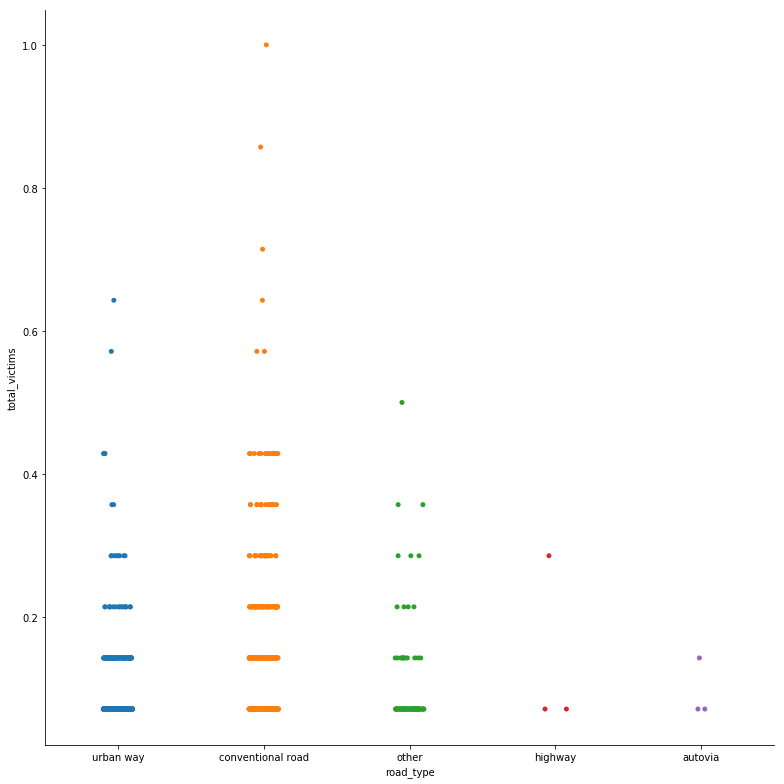

In [63]:
# plot of victims with the variables of road_type
ax19= sns.catplot(x= 'road_type', y='total_victims', data=df, height = 11, aspect = 1)

In [64]:
# ANOVA test for the road variables
f_val_road, p_val_road = stats.f_oneway(df_object.get_group(0)['total_victims'], df_object.get_group(1)['total_victims'],
                                        df_fd.get_group(0)['total_victims'], df_fd.get_group(1)['total_victims'],
                                        df_slv.get_group(0)['total_victims'], df_slv.get_group(1)['total_victims'],
                                        df_inter.get_group('inside intersection')['total_victims'], df_inter.get_group('more than 50m')['total_victims'],
                                        df_inter.get_group('no')['total_victims'], df_illum.get_group('clear day')['total_victims'],
                                        df_illum.get_group('dark day')['total_victims'],
                                        df_illum.get_group('down/dusk')['total_victims'],
                                        df_illum.get_group('night/insufficient artificial lightning')['total_victims'],
                                        df_illum.get_group('night/no artificial lightning')['total_victims'],
                                        df_illum.get_group('night/sufficient artificial lightning')['total_victims'],
                                        df_prior.get_group('authorized person')['total_victims'], df_prior.get_group('road markings')['total_victims'],
                                        df_prior.get_group('step priority')['total_victims'], df_prior.get_group('stop signal')['total_victims'],
                                        df_prior.get_group('traffic light')['total_victims'], df_dir.get_group('double way lane')['total_victims'],
                                        df_dir.get_group('one way lane')['total_victims'], df_toa.get_group('moving vehicles')['total_victims'],
                                        df_toa.get_group('other')['total_victims'], df_toa.get_group('over turned')['total_victims'],
                                        df_toa.get_group('run over')['total_victims'], df_toa.get_group('track exit')['total_victims'],
                                        df_toa.get_group('vehicle against obstacle')['total_victims'], df_zone.get_group('city')['total_victims'],
                                        df_zone.get_group('road')['total_victims'], df_zone.get_group('travers')['total_victims'],
                                        df_rc.get_group('dry')['total_victims'], df_rc.get_group('flooded')['total_victims'],
                                        df_rc.get_group('slippery')['total_victims'], df_rc.get_group('snowed')['total_victims'],
                                        df_rc.get_group('wet')['total_victims'], df_rt.get_group('autovia')['total_victims'],
                                        df_rt.get_group('conventional road')['total_victims'], df_rt.get_group('highway')['total_victims'],
                                        df_rt.get_group('other')['total_victims'], df_rt.get_group('urban way')['total_victims'])
print( "ANOVA road conditions results: F =", f_val_road, ", P =", p_val_road)

ANOVA road conditions results: F = 7.270936413784308 , P = 3.812266452342534e-39


### 3.4. Time <a name='time'></a>

On this variables we'll determine if the moment of the day (morning, afternoon, night) or the nature of the da (weekend, work day) are a relevant factor on the moment to have a traffic accident.

In [65]:
# ANOVA test for variable 'moment' and the total amount of victims
df_mom = df[['total_victims', 'moment']].groupby(['moment'])
f_val_mom, p_val_mom = stats.f_oneway(df_mom.get_group('afternoon')['total_victims'], df_mom.get_group('morning')['total_victims'],
                                      df_mom.get_group('night')['total_victims'])
print( "ANOVA 'moment' results: F =", f_val_mom, ", P =", p_val_mom)

ANOVA 'moment' results: F = 5.657478765205659 , P = 0.003604341332109916


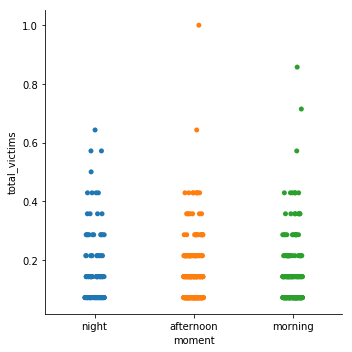

In [66]:
# plot of victims with the variables of moment
ax20= sns.catplot(x= 'moment', y='total_victims', data=df)

In [67]:
# ANOVA test for variable 'day_type' and the total amount of victims
df_dt = df[['total_victims', 'day_type']].groupby(['day_type'])
f_val_dt, p_val_dt = stats.f_oneway(df_dt.get_group('weekend')['total_victims'], df_dt.get_group('work day')['total_victims'])
print( "ANOVA 'day_type' results: F =", f_val_dt, ", P =", p_val_dt)

ANOVA 'day_type' results: F = 26.61026779295071 , P = 3.001781384997731e-07


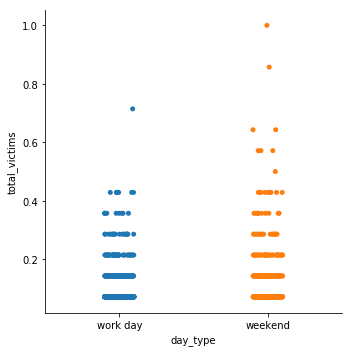

In [68]:
# plot of victims with the variables of day_type
ax21= sns.catplot(x= 'day_type', y='total_victims', data=df)

In [69]:
# ANOVA test for the time variables
f_val_time, p_val_time = stats.f_oneway(df_dt.get_group('weekend')['total_victims'], df_dt.get_group('work day')['total_victims'],
                                        df_mom.get_group('afternoon')['total_victims'], df_mom.get_group('morning')['total_victims'],
                                        df_mom.get_group('night')['total_victims'])
print( "ANOVA time results: F =", f_val_time, ", P =", p_val_time)

ANOVA time results: F = 9.450693664019523 , P = 1.442714418786241e-07


## 4. Modelling <a name='model'></a>

Due the nature of the used data the desicion of use a multiple linear regression model was made, for this well need to transform the categorical data into numerical data; this will be done using the get_dummies() process. We'll make use of the dataframe 'df_unit' created to analyze the numerical data on the previous step.

In [70]:
# Get the dummies for each categorical column
df = pd.get_dummies(data = df, columns = ['day_type', 'moment', 'road_type', 'terrain_characteristics', 'special_lane', 'special_traffic_measures',
                                          'special_function_track', 'intersection', 'illumination', 'directions', 'zone', 'climatology', 'wind',
                                          'type_of_accident', 'road_condition', 'priority_regulation'])

# Set numerical values and replace NaN values
df.replace(np.nan, 0, inplace = True)
df = df._get_numeric_data()

# Display the first rows of the dataframe with the dummies columns
df.head()

,total_victims,involved_pedestrian(s),involved_bycicle(s),involved_moped(s),involved_motorcycle(s),light_vehicle(s)_involved,heavy_vehicle(s)_involved,other_type_unit_involved,maximun_allowed_speed,haze,...,road_condition_dry,road_condition_flooded,road_condition_slippery,road_condition_snowed,road_condition_wet,priority_regulation_authorized person,priority_regulation_road markings,priority_regulation_step priority,priority_regulation_stop signal,priority_regulation_traffic light
0,0.071429,0.0,0.0,0.0,0.000000,0.2,0.000000,0.5,0.833333,0.0,...,1,0,0,0,0,0,0,1,0,0
1,0.285714,0.0,0.0,0.0,0.000000,0.2,0.000000,0.0,0.333333,0.0,...,1,0,0,0,0,0,0,0,1,0
2,0.214286,0.0,0.0,0.0,0.000000,0.4,0.333333,0.0,0.666667,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0.642857,0.0,0.0,0.0,0.000000,0.4,0.000000,0.0,0.833333,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0.071429,0.0,0.0,0.0,0.166667,0.0,0.000000,0.0,0.833333,0.0,...,1,0,0,0,0,0,0,1,0,0


In [71]:
# Define the target
y_data = df['total_victims']

The model will be fitted with the predictor values of the correlated variables determined on the analysis, the process to follow will be adding a group of values, training, and evaluating.

In [72]:
# Define x
x_data = df[['wind_hard wind', 'wind_medium wind', 'wind_no/soft wind', 'road_type_autovia', 'road_type_conventional road', 'road_type_highway', 'road_type_other', 'road_type_urban way',
            'road_condition_dry', 'road_condition_flooded', 'road_condition_slippery', 'road_condition_snowed', 'road_condition_wet', 'type_of_accident_moving vehicles', 'type_of_accident_other',
             'type_of_accident_over turned', 'type_of_accident_run over', 'type_of_accident_track exit', 'type_of_accident_vehicle against obstacle', 'priority_regulation_authorized person',
             'priority_regulation_road markings', 'priority_regulation_step priority', 'priority_regulation_stop signal', 'priority_regulation_traffic light', 'haze', 'climatology_hard rain',
             'climatology_snow', 'climatology_soft rain', 'zone_city', 'zone_road', 'zone_travers', 'illumination_clear day', 'illumination_dark day', 'illumination_down/dusk',
             'illumination_night/insufficient artificial lightning', 'illumination_night/no artificial lightning', 'illumination_night/sufficient artificial lightning', 'object_on_way',
             'f/d_in_road', 'speed_limit_visualization', 'other_type_unit_involved', 'other_type_unit_involved', 'involved_motorcycle(s)', 'involved_pedestrian(s)', 'involved_bycicle(s)',
             'involved_moped(s)']]

In [73]:
# define the function to use
lm2 = LinearRegression()

# Train the model
lm2.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
# MSE
Y_predict_multifit = lm2.predict(x_data)
mean_squared_error(y_data, Y_predict_multifit)

0.007404822608570054

## 5. Evaluation <a name='evalu'></a>

It was decided to use the MSE metric to calculate the accuracy of the model due the good performance of this metric on the trained model.

In [75]:
# Split the data between training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 100
number of training samples: 900


In [76]:
# Define and train model with splitted data
lm3 = LinearRegression()
lm3.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
# MSE for the testing data
Y_predict_multifit_model = lm3.predict(x_test)
print('MSE =', mean_squared_error(y_test, Y_predict_multifit_model))

MSE = 0.004136615286068041


With this model, whom MSE is 0.004 on  the test data, we determine a  good level of accuracy on the prediction.

## 6. Conclusions <a name='conc'></a>

* The most relevant variables in order to predict the severity of a traffic accident are the ones related to the weather and the status of the road.
* The amount and type of units involved on the accident are not soo correlated as they seem to be.
* Good climatic conditions present more severe traffic accidents.
* There is no big difference on the accidents occured on work days and the ones occured on weekends.